<a href="https://colab.research.google.com/github/kopapatzimos/active_power_prediction_api/blob/main/random_forest_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# lets start by reading csv
import pandas as pd
df = pd.read_csv('energy_weather_raw_data.csv')
print(df.info())
print(df.isna().sum())
data = df.dropna(subset=['temp_t+1','feels_like_t+1'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151246 entries, 0 to 151245
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            151246 non-null  object 
 1   active_power    151246 non-null  float64
 2   current         151246 non-null  float64
 3   voltage         151246 non-null  float64
 4   reactive_power  151246 non-null  float64
 5   apparent_power  151246 non-null  float64
 6   power_factor    151245 non-null  float64
 7   main            151245 non-null  object 
 8   description     151245 non-null  object 
 9   temp            151245 non-null  float64
 10  feels_like      151245 non-null  float64
 11  temp_min        151245 non-null  float64
 12  temp_max        151245 non-null  float64
 13  pressure        151245 non-null  float64
 14  humidity        151245 non-null  float64
 15  speed           151245 non-null  float64
 16  deg             151245 non-null  float64
 17  temp_t+1  

In [21]:
# create new columns for dates
data['date'] = pd.to_datetime(data['date'])
data['day_of_week'] = data['date'].dt.dayofweek  # Monday=0, Sunday=6
data['month'] = data['date'].dt.month
data['hour'] = data['date'].dt.hour
data['year'] = data['date'].dt.year


<ipython-input-21-958de11944fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
<ipython-input-21-958de11944fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_week'] = data['date'].dt.dayofweek  # Monday=0, Sunday=6
<ipython-input-21-958de11944fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [22]:
# do some checks
print(data['hour'].unique())
print(data['month'].unique())
print(data['day_of_week'].unique())
print(data['year'].unique())

[14 15 16 17 18 19 20 21 22 23  0  1  2  3  4  5  6  7  8  9 10 11 12 13]
[11 12  1  2]
[5 6 0 1 2 3 4]
[2022 2023]


In [23]:
# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(data, drop_first=True)
# Calculate the correlation matrix on the encoded data
correlation_matrix = df_encoded.corr()
# Display correlations of active_power with other features
print(correlation_matrix['active_power'].sort_values(ascending=False))

active_power                           1.000000
apparent_power                         0.989228
current                                0.988731
reactive_power                         0.612350
power_factor                           0.565761
hour                                   0.185715
temp_max                               0.107450
feels_like_t+1                         0.070588
temp_t+1                               0.070518
feels_like                             0.069318
temp                                   0.067943
temp_min                               0.056019
description_fog                        0.053331
main_Fog                               0.053331
month                                  0.038217
main_Mist                              0.030795
description_mist                       0.030795
humidity                               0.026953
description_haze                       0.025264
main_Haze                              0.025264
description_light intensity drizzle    0

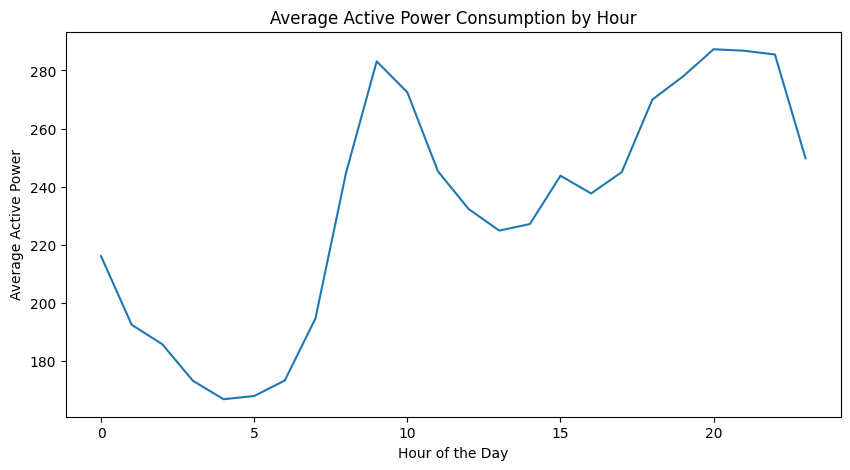

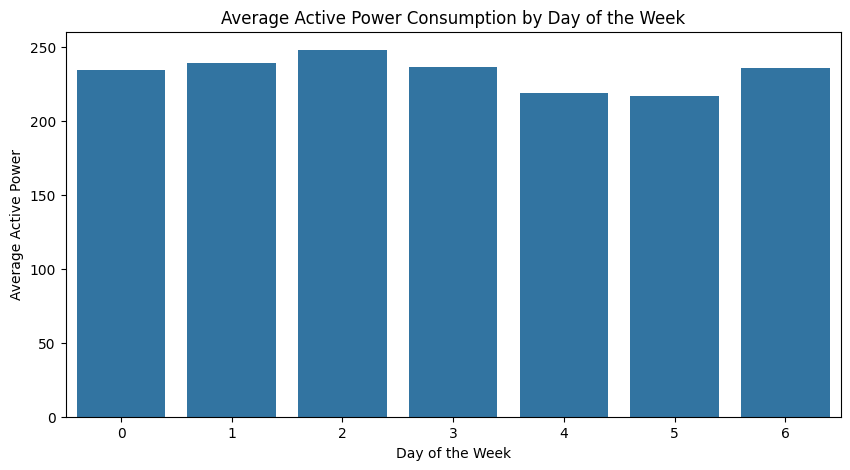

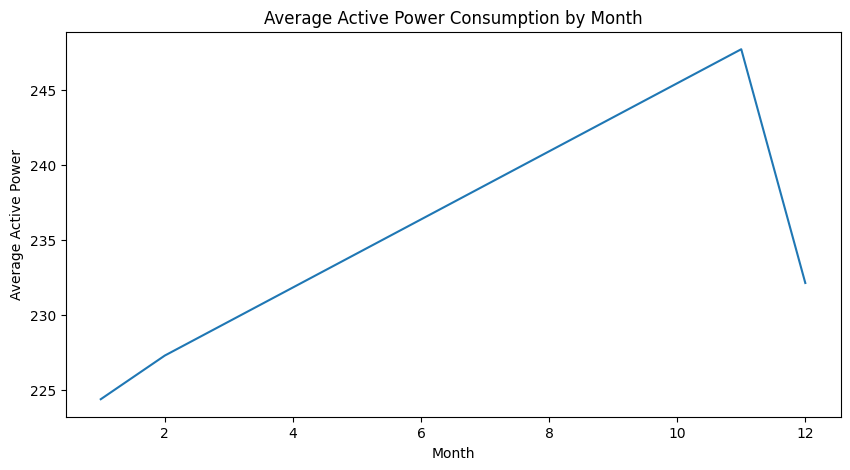

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Average active_power by hour to check hourly usage patterns
hourly_trend = data.groupby('hour')['active_power'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_trend.index, y=hourly_trend.values)
plt.title('Average Active Power Consumption by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Active Power')
plt.show()

# Average active_power by day of the week to check weekly patterns
weekly_trend = data.groupby('day_of_week')['active_power'].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=weekly_trend.index, y=weekly_trend.values)
plt.title('Average Active Power Consumption by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Active Power')
plt.show()

# Average active_power by month to identify seasonal trends
monthly_trend = data.groupby('month')['active_power'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values)
plt.title('Average Active Power Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Average Active Power')
plt.show()



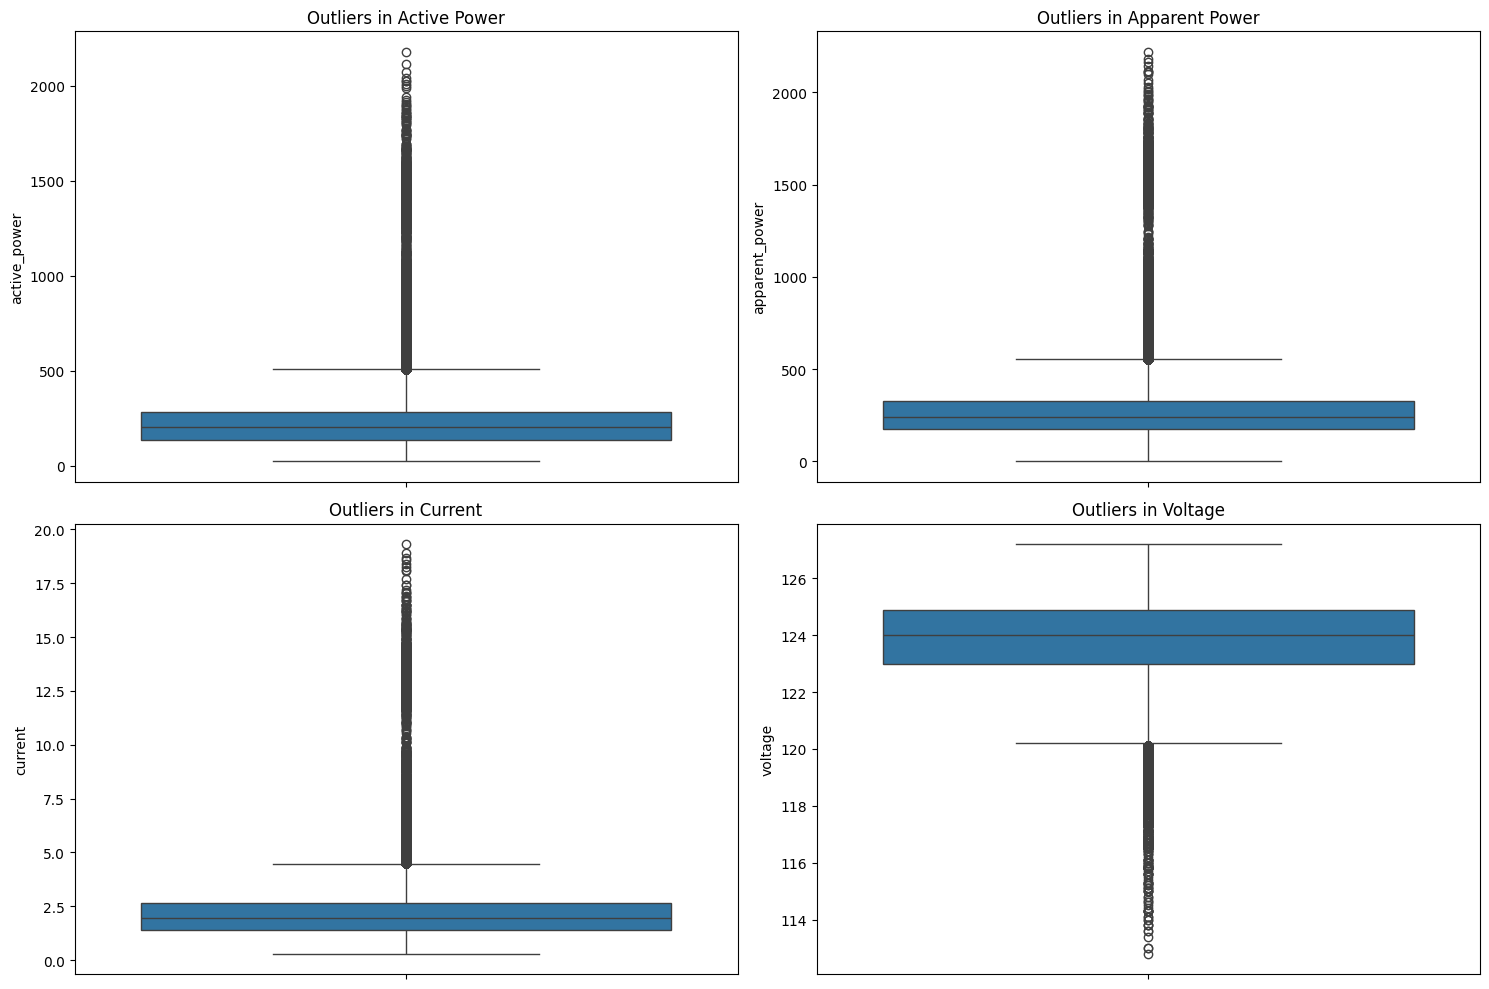

In [25]:
# Box plots to detect outliers in primary features
plt.figure(figsize=(15, 10))

# Plot active_power
plt.subplot(2, 2, 1)
sns.boxplot(y='active_power', data=df)
plt.title('Outliers in Active Power')

# Plot apparent_power
plt.subplot(2, 2, 2)
sns.boxplot(y='apparent_power', data=df)
plt.title('Outliers in Apparent Power')

# Plot current
plt.subplot(2, 2, 3)
sns.boxplot(y='current', data=df)
plt.title('Outliers in Current')

# Plot voltage
plt.subplot(2, 2, 4)
sns.boxplot(y='voltage', data=df)
plt.title('Outliers in Voltage')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])

cap_outliers(data, 'active_power')
cap_outliers(data, 'apparent_power')
cap_outliers(data, 'current')

In [28]:
from sklearn.model_selection import train_test_split

# Define target and features
target = 'active_power'
features = data[['apparent_power', 'current', 'reactive_power', 'power_factor', 'voltage', 'hour']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, data[target], test_size=0.2, random_state=42)

print("Training and testing sets created:")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


Training and testing sets created:
X_train shape: (120996, 6), X_test shape: (30249, 6)


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Performance:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"R^2 Score: {r2_rf:.2f}")



Random Forest Regressor Performance:
Mean Squared Error: 0.18
Mean Absolute Error: 0.05
R^2 Score: 1.00


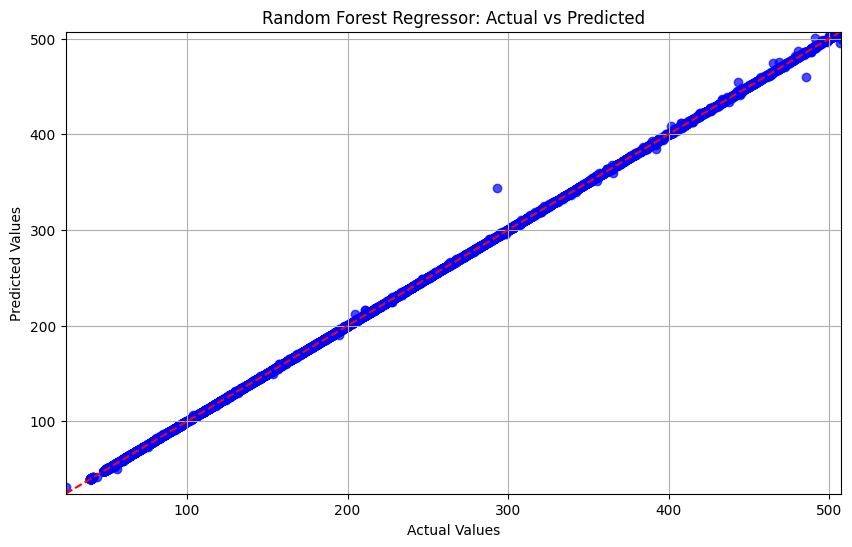

In [30]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line for perfect predictions
plt.title("Random Forest Regressor: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()


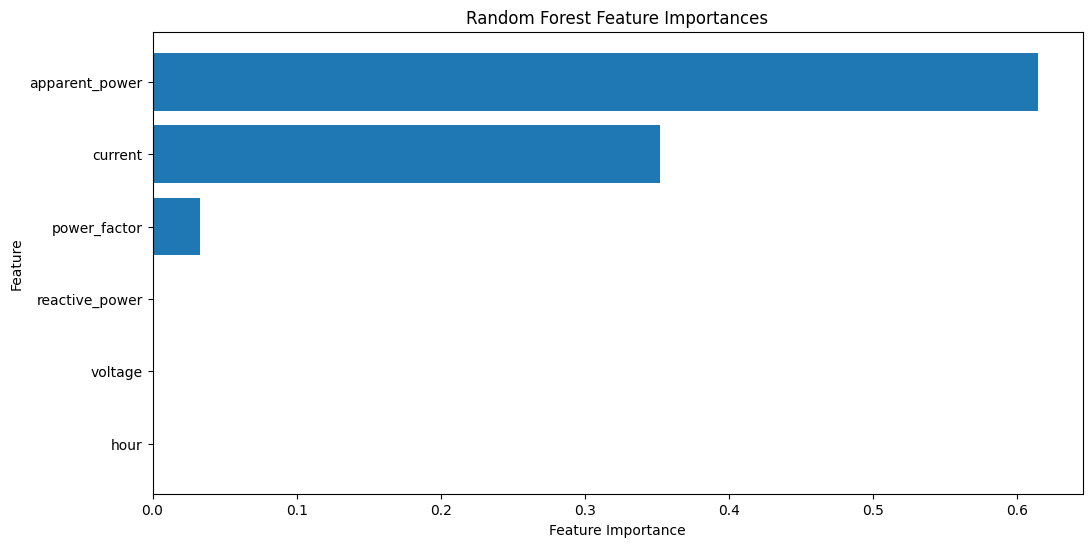

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importances
feature_importances = rf_model.feature_importances_
features = X_train.columns  # Ensure this matches the feature names in X_train

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()


In [32]:

# Define target and features with the most important
target = 'active_power'
features = data[['apparent_power', 'current', 'power_factor',]]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, data[target], test_size=0.2, random_state=42)

print("Training and testing sets created:")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Performance:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"R^2 Score: {r2_rf:.2f}")


Training and testing sets created:
X_train shape: (120996, 3), X_test shape: (30249, 3)

Random Forest Regressor Performance:
Mean Squared Error: 0.24
Mean Absolute Error: 0.05
R^2 Score: 1.00


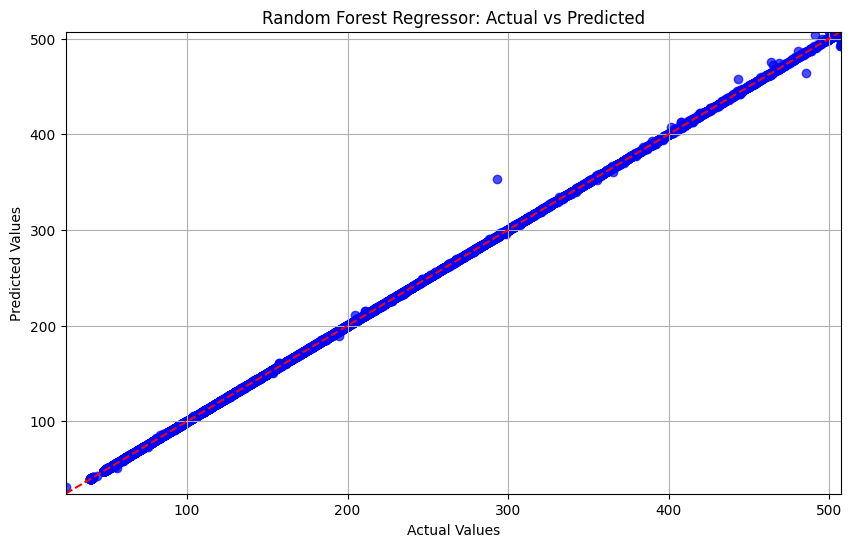

In [33]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line for perfect predictions
plt.title("Random Forest Regressor: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()


In [41]:
# do  5-fold cross-validation to ensure that there is no overfitting - we had 100% accuracy and i wasnt sure
cv_mse_scores = -cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mae_scores = -cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

print("\nCross-Validation Results (5-fold):")
print(f"Mean Squared Error: {np.mean(cv_mse_scores):.2f} (+/- {np.std(cv_mse_scores):.2f})")
print(f"Mean Absolute Error: {np.mean(cv_mae_scores):.2f} (+/- {np.std(cv_mae_scores):.2f})")
print(f"R^2 Score: {np.mean(cv_r2_scores):.2f} (+/- {np.std(cv_r2_scores):.2f})")


Cross-Validation Results (5-fold):
Mean Squared Error: 1.51 (+/- 1.27)
Mean Absolute Error: 0.06 (+/- 0.01)
R^2 Score: 1.00 (+/- 0.00)


In [42]:
from joblib import dump
# Save the trained model
dump(rf_model, "random_forest_model.joblib")


['random_forest_model.joblib']